# **Project: Providing data-driven suggestions for HR**

# **PACE stages**


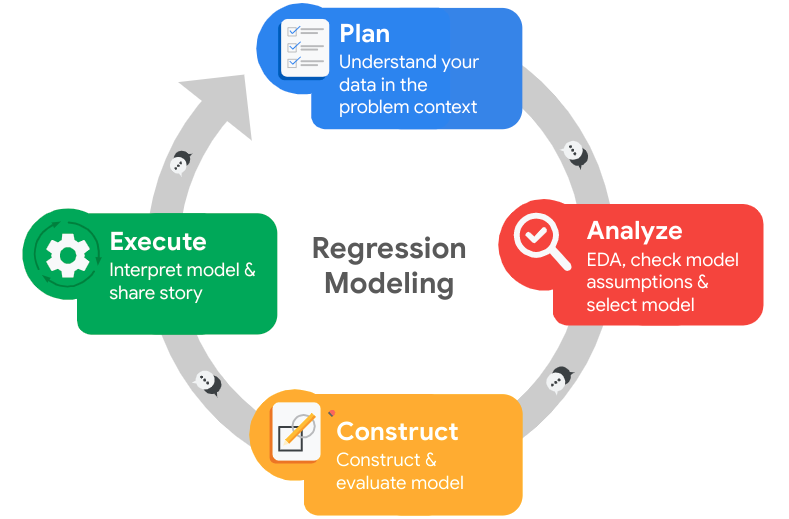

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

### Familiarize yourself with the HR dataset

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



In [116]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [7]:
# Gather basic information about the data
print(df0.shape)
print(df0.info())


(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Gather descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [14]:
# Display all column names
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [15]:
# Rename columns as needed
df0 = df0.rename(columns = {'average_montly_hours':'average_monthly_hours', 'time_spend_company':'tenure', 'Work_accident':'work_accident','Department':'department'})


# Display all column names after the update
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Check missing values

In [20]:
# Check for missing values
print(df0.isna().sum())


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

In [24]:
# Check for duplicates
num_duplicates = df0.duplicated().sum()
print(num_duplicates)


3008


In [25]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()].head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [28]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
print(df1.shape)
df1.head(5)

(11991, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

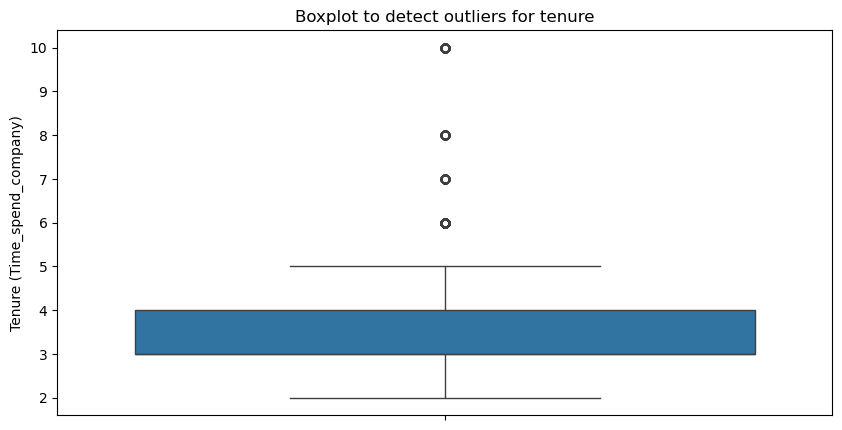

In [32]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,5))
sns.boxplot(y = df1['tenure'])
plt.ylabel('Tenure (Time_spend_company)')
plt.title('Boxplot to detect outliers for tenure')

plt.show()


In [33]:
# Determine the number of rows containing outliers
# Calculate the IQR (Interquartile Range) for 'time_spend_company'
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower limit:", lower_bound)
print("Upper limit:", upper_bound)

# Identify outliers
outliers = df1[(df1['tenure'] < lower_bound) | (df1['tenure'] > upper_bound)]

# Display outliers and count
#print(f"Number of rows containing outliers: {num_outliers}")
#print(outliers)  # Display the actual outlier rows

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)


In [36]:
# Get numbers of people who left vs. stayed
left_stayed_counts = df1['left'].value_counts()

# Get percentages of people who left vs. stayed
left_stayed_percent = df1['left'].value_counts(normalize = True)*100

print("Numbers of people who left vs. stayed:")
print(left_stayed_counts)

print("Percentages of people who left vs. stayed:")
print(left_stayed_percent)


Numbers of people who left vs. stayed:
left
0    10000
1     1991
Name: count, dtype: int64
Percentages of people who left vs. stayed:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### Data visualizations

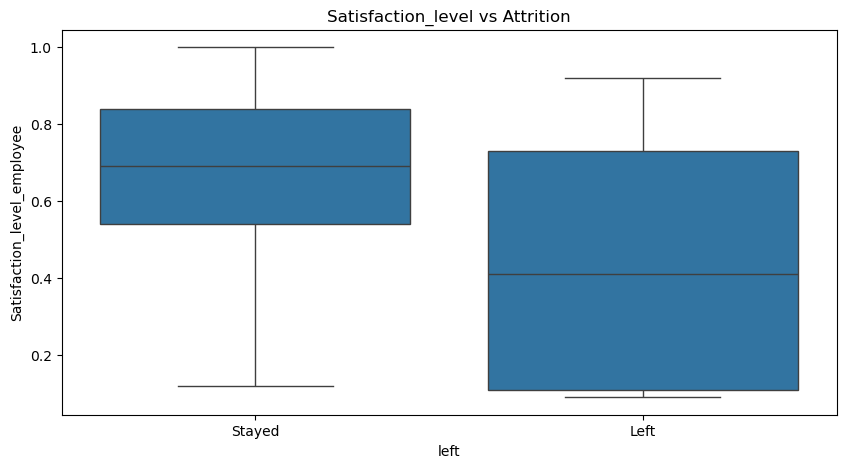

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x= df1['left'], y = df1['satisfaction_level'])
plt.xticks(ticks=[0, 1], labels=["Stayed", "Left"])
plt.ylabel('Attrition')
plt.ylabel('Satisfaction_level_employee')
plt.title('Satisfaction_level vs Attrition')
plt.show()

* Median Satisfaction Level (Middle Line in Each Box)
   - Employees who stayed have a higher median satisfaction (~0.7-0.8).
   - Employees who left have a lower median satisfaction (~0.4-0.5).
   - This indicates that lower satisfaction levels are strongly correlated with employee attrition.
* Spread of Data (Box & Whiskers)
   - Employees who stayed have a higher overall satisfaction range (0.4 to 1.0).
   - Employees who left have a broader distribution, with satisfaction levels ranging from 0.1 to ~0.9.
   - Some employees left despite having high satisfaction, suggesting there may be other factors influencing their decision.
* Skewness & Trends
   - Employees who stayed have higher overall satisfaction, with the majority falling between 0.6 and 0.9.
   - Employees who left have a significant proportion with satisfaction levels below 0.5.
   - This suggests that dissatisfied employees are much more likely to leave.

##### Key Business Insights
* Low job satisfaction is a key factor driving employee attrition.
##### Preventive Measures:
* Conduct employee engagement surveys to understand dissatisfaction causes.
* Improve work culture, compensation, and career growth opportunities.
* Introduce flexible work arrangements to enhance satisfaction.


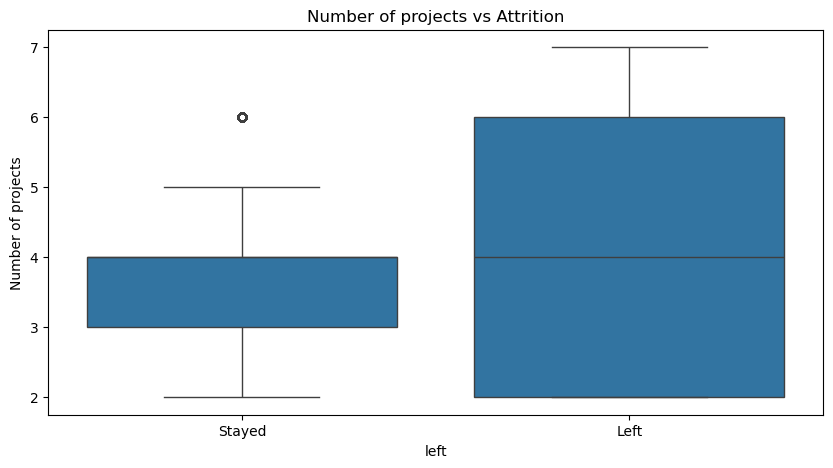

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['left'], y=df1['number_project'])
plt.xticks(ticks=[0,1], labels=['Stayed', 'Left'])
plt.ylabel('Number of projects')
plt.title('Number of projects vs Attrition')
plt.show()

* Median Number of Projects (Middle Line in Each Box)

   - Employees who left had a higher median number of projects (~4-5 projects).
   - Employees who stayed had a lower median (~3-4 projects).
   - This suggests that employees handling more projects are more likely to leave.
* Spread of Data (Box & Whiskers)

   - Employees who left had a wider interquartile range (IQR), indicating greater variation in workload.
   - Employees who stayed had a more compact distribution, meaning most of them worked on similar project loads.
* OutliersThere are outliers in the "Stayed" category (employees with 6+ projects).

   - These outliers suggest that some employees manage a high workload but still choose to stay.
* Skewness & Trends

   - Employees who left had a more balanced spread across projects, but those with 5+ projects were at a higher risk of leaving.
   - Employees who stayed mostly had 2 to 5 projects, suggesting a manageable workload may improve retention.

##### Key Business Insights
* Employees handling more projects tend to leave more frequently.
##### Preventive Measures:
* Monitor workload distribution to prevent burnout.
* Offer support systems or extra incentives for employees managing many projects.
* Investigate whether project complexity contributes to attrition, not just the number of projects.


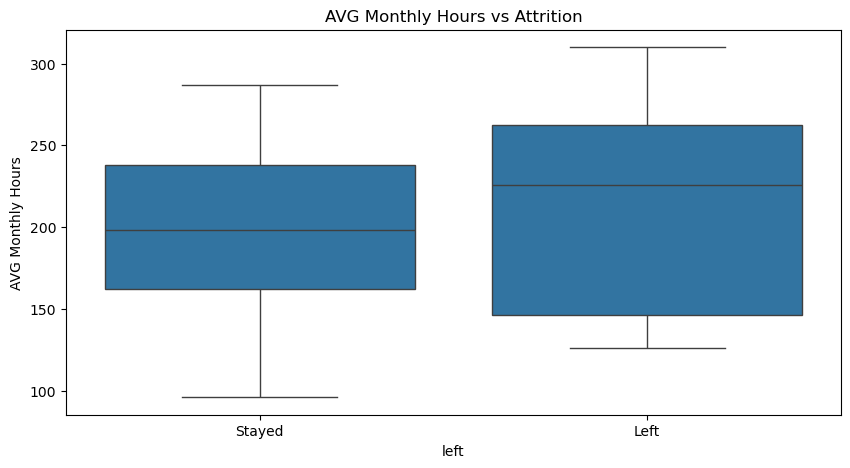

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['left'], y=df1['average_monthly_hours'])
plt.xticks(ticks = [0,1], labels=['Stayed', 'Left'])
plt.ylabel('AVG Monthly Hours')
plt.title('AVG Monthly Hours vs Attrition')
plt.show()

* Median Comparison (Middle Line in Each Box)
   - The median average monthly hours is higher for employees who left compared to those who stayed.
   - This suggests that employees who worked more hours per month were more likely to leave.
* Spread of Data (Box & Whiskers)
   - The spread (IQR) is wider for employees who left, meaning there is more variability in their working hours.
   - Employees who stayed have a lower and more compact interquartile range (IQR).
* Whiskers & Outliers
   - The whiskers for employees who left extend higher, indicating that some employees worked significantly more than the typical range.
   - This suggests that overworking might be a reason for leaving.
* Skewness
   - The right-skewed distribution (longer whisker on the right) in the "Left" category indicates some employees worked extremely high hours before leaving.
   - This aligns with burnout or workload stress as a possible factor in attrition.

##### Key Business Insights
* Employees who worked more hours per month had a higher chance of leaving.
##### Preventive Measures:
* Investigate work-life balance policies.
* Monitor overtime hours to avoid employee burnout.
* Implement workload distribution improvements.

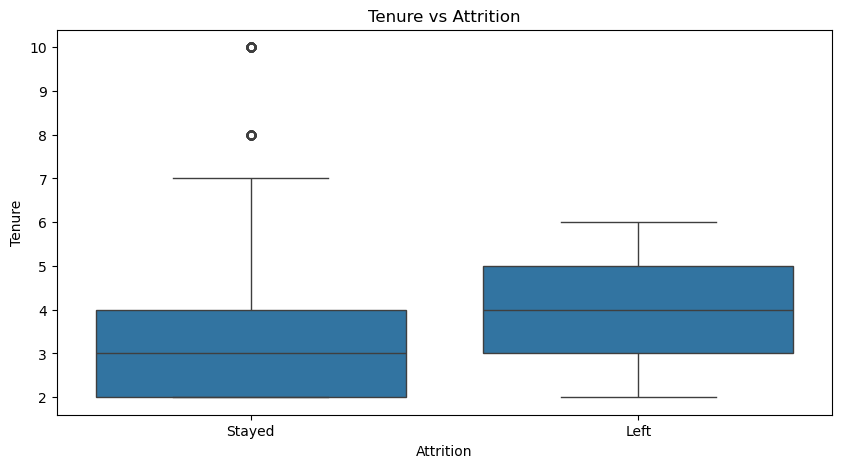

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['left'], y=df1['tenure'])
plt.xticks(ticks=[0,1], labels = ['Stayed', 'Left'])
plt.ylabel('Tenure')
plt.xlabel('Attrition')
plt.title('Tenure vs Attrition')
plt.show()

* Median Tenure Comparison (Middle Line in Each Box)
   - Employees who left had a higher median tenure (~4 years) compared to those who stayed (~3 years).
   - This suggests that employees might leave after a few years, possibly due to lack of career growth or promotions.
* Spread of Data (Box & Whiskers)
   - Employees who stayed have a wider interquartile range (IQR), meaning tenure varies more among them.
   - Employees who left have a more concentrated tenure range (around 2 to 5 years), indicating attrition is most common within this period.
* Outliers
   - There are outliers in the "Stayed" category, with some employees staying for 7+ years and even 10 years.
   - This indicates that a small number of employees remain in the company for an exceptionally long period.
* Skewness & Trends
   - The left distribution is more uniform, while the stayed group has a longer upper whisker, indicating some employees have longer careers within the company.
   - Employees leaving around 3-5 years suggests they might expect career progression or promotions, and if not achieved, they leave.

##### Key Business Insights

* Attrition is highest for employees with ~2 to 5 years of tenure.
* Retention strategies should focus on employees in their early and mid-career stages.
* Investigate promotion policies and career development programs to improve retention.
* Analyze why long-tenured employees stay and apply those strategies to mid-career employees.

In [49]:
salary_counts = df1.groupby(['salary', 'left'])['left'].count().unstack()

salary_counts.head(5)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


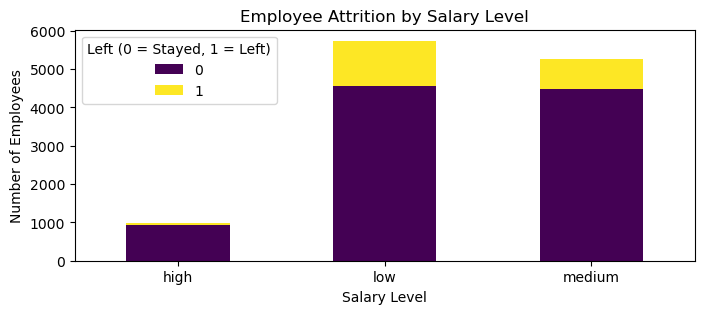

In [50]:
# Salary Impact: Employees with low salaries could be at higher risk of leaving
    
salary_counts.plot(kind='bar', stacked=True, figsize=(8, 3), colormap="viridis")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.title("Employee Attrition by Salary Level")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.legend(title="Left (0 = Stayed, 1 = Left)")
plt.show()

* Low-Salary Employees Have the Highest Attrition
   - The largest group of employees falls under the low salary category.
   - A significant portion of low-salary employees left, as indicated by the yellow bar.
   - This suggests that low salary is a major factor in employee attrition.
* Medium-Salary Employees Have Moderate Attrition
   - The number of employees in the medium salary category is similar to the low-salary group.
   - However, fewer employees left, indicating that better salaries might contribute to higher retention.
* High-Salary Employees Have the Lowest Attrition
   - The smallest employee group is in the high salary category.
   - Very few employees left, suggesting that higher pay significantly reduces turnover.


##### Key Business Insights
* Salary has a strong correlation with employee retention.
* Low-salary employees are more likely to leave compared to medium- and high-salary employees.
##### Preventive Measures:
* Review and improve salary structures to retain low-salary employees.
* Offer incentives, career development, and performance-based raises.
* Focus retention efforts on medium-salary employees to further reduce attrition.

In [54]:
employee_department_counts = df1.groupby(['department', 'left'])['left'].count().unstack()

employee_department_counts.head(5)

left,0,1
department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52


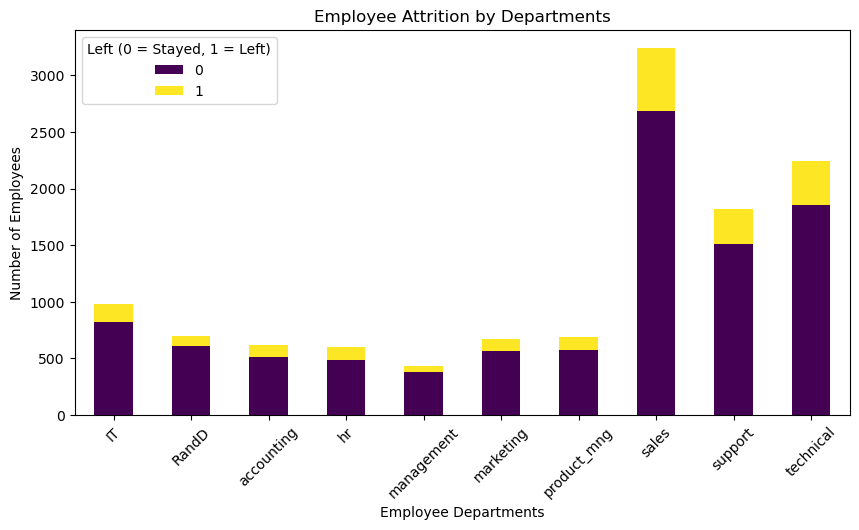

In [55]:
employee_department_counts.plot(kind='bar', stacked=True, figsize=(10, 5), colormap="viridis")
plt.xlabel("Employee Departments")
plt.ylabel("Number of Employees")
plt.title("Employee Attrition by Departments")
plt.xticks(rotation=45)  # Keep labels horizontal
plt.legend(title="Left (0 = Stayed, 1 = Left)")
plt.show()

* Sales Department Has the Highest Attrition
   - The sales department has the largest number of employees.
   - It also has the highest number of employees who left, as indicated by the yellow section.
   - This suggests that employees in sales are at higher risk of leaving compared to other departments.
* Technical and Support Departments Also Show Higher Attrition
   - The technical and support teams also have visible attrition rates.
   - While not as high as sales, these departments might still need retention strategies.
* Lower Attrition in R&D, IT, and HR
   - Departments such as R&D, IT, and HR have fewer employees leaving.
   - This could indicate better job satisfaction, stability, or career growth in these areas.


##### Key Business Insights
* Sales has the highest turnover, suggesting possible issues with workload, stress, or career progression.
* Technical and support teams also show moderate attrition, requiring attention.
* Departments like IT, R&D, and HR have lower attrition, indicating better retention policies.

##### Recommended Actions
* Sales Department:
Investigate workload, commission structures, and career growth opportunities.
Provide training and incentives to improve engagement.
* Technical & Support Teams:
Review workload distribution and offer skill development programs.


In [58]:
numeric_df = df1.select_dtypes(include=['number'])

Text(0.5, 1.0, 'Correlation Heatmap')

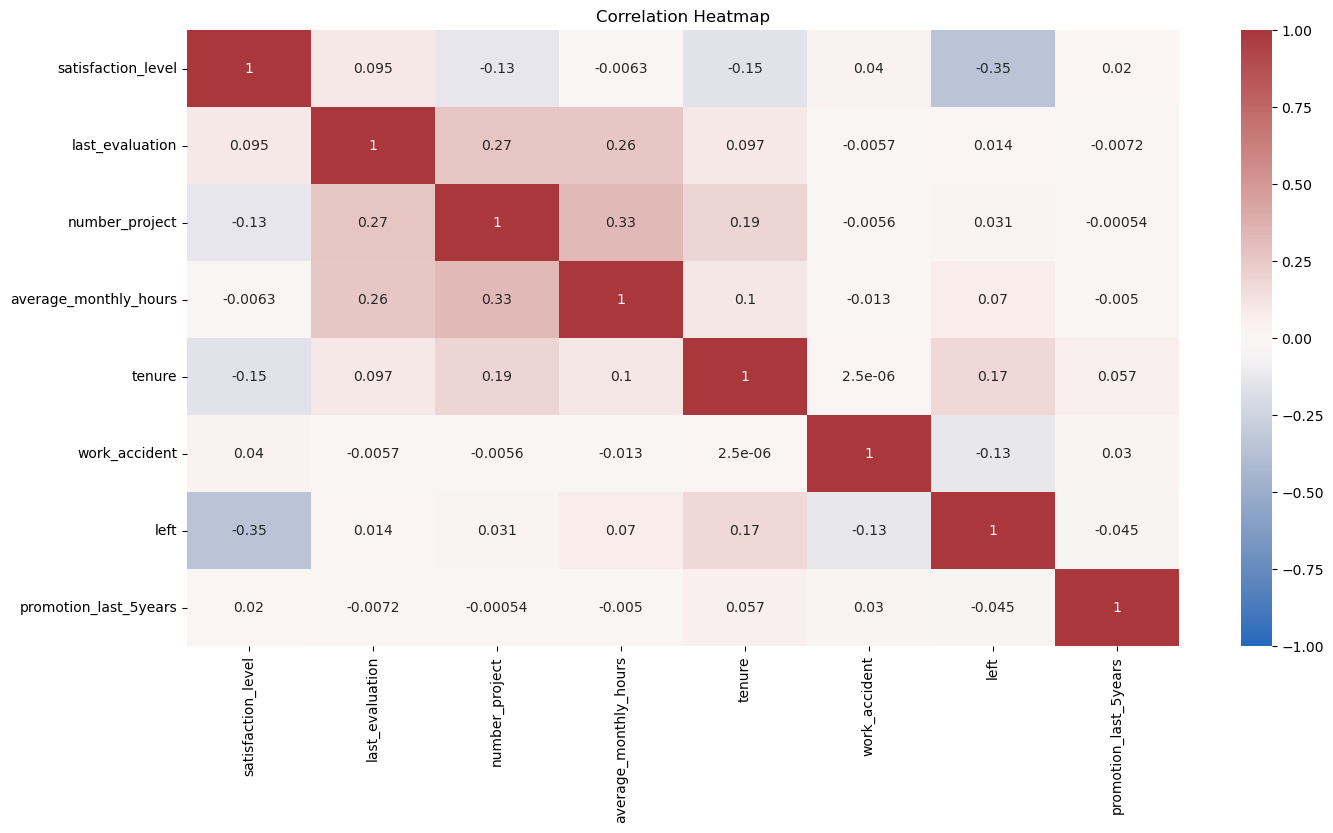

In [59]:
plt.figure(figsize = (16,8))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True,cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap')

The Correlation Heatmap confirm that the number of projects, monthly hours, evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

Employee who left company had low satisfaction level and more projects, low salary


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

##### The most relevant predictors based on EDA insights:

Feature	Reason for Inclusion
* satisfaction_level	Strong relationship with attrition (lower satisfaction → higher attrition).
* average_monthly_hours	Overwork is linked to employees leaving.
* number_project	More projects could lead to burnout.
* time_spend_company	Mid-career employees (~3-5 years) tend to leave more.
* promotion_last_5years	Lack of promotions may contribute to attrition.
* salary (encoded as categorical)	Low salaries contribute to higher attrition.

### Identify the types of models most appropriate for this task.

##### Logistic Regression

Since our target variable left is binary (0 = stayed, 1 = left), we will use Logistic Regression, which is well-suited for classification problems.

* Why Logistic Regression?

  * It predicts probabilities of an event occurring.
  * It is interpretable and useful for understanding feature importance.
  * It assumes a linear relationship between independent variables and the log odds of the dependent variable.


### Modeling


In [76]:
# Copy the dataframe
df_lr = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_lr['salary'] = (
    df_lr['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_lr = pd.get_dummies(df_lr, drop_first=False)

# Display the new dataframe
df_lr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [78]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_lr[(df_lr['tenure'] >= lower_bound) & (df_lr['tenure'] <= upper_bound)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [79]:
# Save X and y data into variables
y = df_logreg[["left"]]
X = df_logreg.drop("left", axis=1)

In [80]:
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

In [81]:
# Ensure y_train is 1D instead of 2D
y_train = y_train.values.ravel()

In [82]:
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [83]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities of attrition

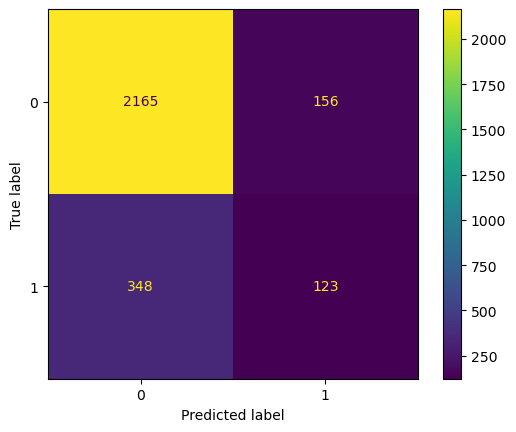

In [85]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(values_format='')
plt.show()

##### Explanation of Each Value:

* True Negatives (TN) = 2165 → The model correctly predicted 2165 employees stayed.
* False Positives (FP) = 156 → The model incorrectly predicted 156 employees would leave, but they actually stayed.
* False Negatives (FN) = 348 → The model incorrectly predicted 348 employees would stay, but they actually left.
* True Positives (TP) = 123 → The model correctly predicted 123 employees left.

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

target_names = ['Predicted would not leave', 'Predicted would leave']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.82

Classification Report:
                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [88]:
# Logistic Regression Curve Plot
# sns.regplot(x="satisfaction_level", y="left", data=df1, logistic=True)
# plt.title("Logistic Regression Curve - Attrition Probability")
# plt.show()

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Interpretation of logistic Regression Model Performance 

##### Accuracy 
82%, meaning the model correctly classified 82% of employees.

##### Precision (Predicting Attrition)
    - Precision for "stayed" (0) is 86%, meaning that when the model predicts an employee will stay, it is correct 86% of the time.
    - Precision for "left" (1) is 44%, meaning that when the model predicts an employee will leave, it's only correct 44% of the time.
    - Improvement Needed: The model makes too many false positive predictions for attrition.
    
##### Recall (Sensitivity - Identifying Attrition)
    - The model correctly identifies 93% of employees who stayed.
    - However, it only correctly identifies 26% of employees who left.
    - This means that 74% of employees who actually left were predicted to stay (false negatives).
    - Improvement Needed: The model misses too many employees who actually leave.
    
#####  F1-Score (Balancing Precision & Recall)
    - F1-score for "stayed" is 90%, meaning the model is very good at identifying employees who stay.
    - F1-score for "left" is only 33%, meaning the model is weak at identifying employees who actually leave.
